<center>

![Hello There](https://media.tenor.com/0Akz_GWDQyQAAAAM/star-wars-hello-there.gif)

#**Welcome**
<h3>...to a new TA session for <b>IBM3103</b> (Mathematical Methods for Biomedical Engineering).</h3>

</center>

**Methodology** - For this class, we have two goals:
- Understanding basic matrix algebra and properties
- Apply taylor expansions

For both of them, we will take the analytical and the computational approaches.

In this session, we will cover the following topics:
- [Matrix properties & plotting](#matrix1)
- [Matrix as transformations](#matrix2)
- [Taylor expansions](#taylor)

In [80]:
#@title Preparations
using Plots
using LinearAlgebra

<a name="matrix1"></a>
# Matrix Properties & Plotting

## Plotting

Let's say that this is the vector $x=\begin{bmatrix}1 \\ 2\end{bmatrix}$

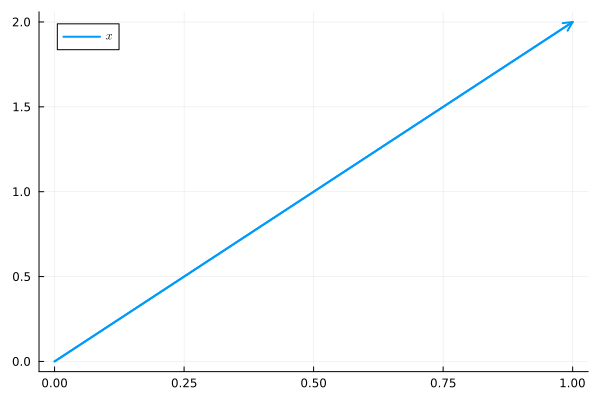

In [81]:
#@title Vector plot
x = [1, 2]
plot([0, x[1]], [0, x[2]], arrow=true, linewidth=2, label="\$x\$")

We can operate it through basically additions and substractions easily. For example, what if we have another vector $y=\begin{bmatrix}0.5\\ -1\end{bmatrix}$, or visually:

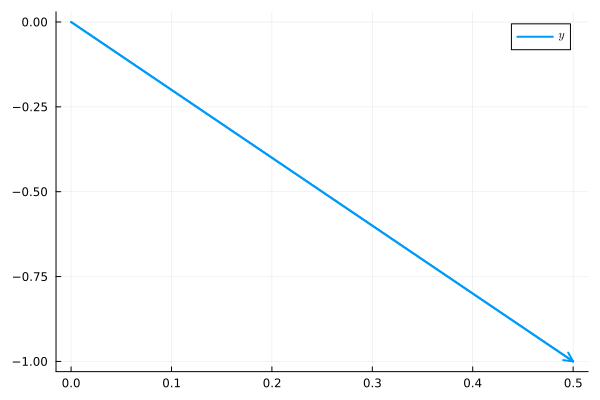

In [82]:
#@title Vector plot
y = [0.5, -1]
plot([0, y[1]], [0, y[2]], arrow=true, linewidth=2, label="\$y\$")

Then, $x+y$ and $x-y$ are

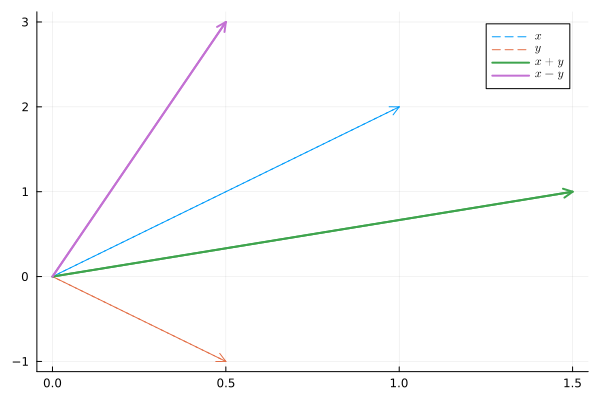

In [83]:
#@title Joint plots
plot([0, x[1]], [0, x[2]], arrow = true, linestyle = :dash, linewidth = 1, label = "\$x\$")
plot!([0, y[1]], [0, y[2]], arrow = true, linestyle = :dash, linewidth = 1, label = "\$y\$")
plot!([0, x[1]+y[1]], [0, x[2] + y[2]], arrow = true, linewidth = 2, label = "\$x+y\$")
plot!([0, x[1]-y[1]], [0, x[2] - y[2]], arrow = true, linewidth = 2, label = "\$x-y\$")

See where we are getting? A matrix is just another way of having two vectors in the same variable. For example, $A=\begin{bmatrix}1 & 0.5\\ 2 & -1\end{bmatrix} = [x\quad y]$ is

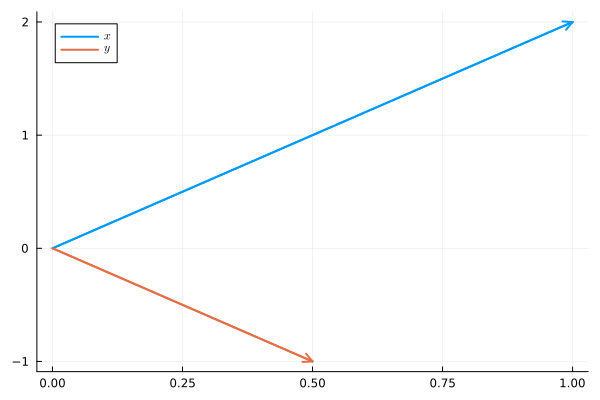

In [84]:
#@title Matrix plot
A = [1 0.5; 2 -1]
plot([0, A[1, 1]], [0, A[2, 1]], arrow = true, linewidth = 2, label = "\$x\$")
plot!([0, A[1, 2]], [0, A[2, 2]], arrow = true, linewidth = 2, label = "\$y\$")

## Your turn
Plot the following vectors and matrices

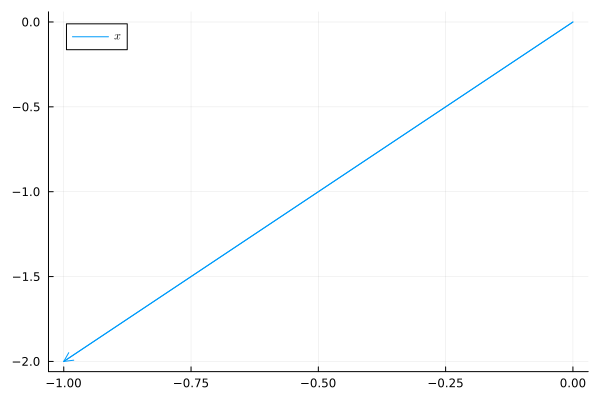

In [109]:
# @title Ex. 1
# @markdown Plot of $x=\begin{bmatrix}-1 \\ -2\end{bmatrix}$
x = [-1; -2]
plot([0, x[1]], [0, x[2]], arrow = true, linewidth = 1, label = "\$x\$")

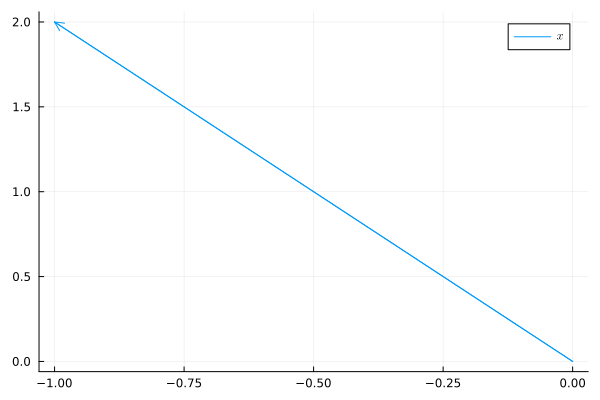

In [110]:
# @title Ex. 2
# @markdown Plot of $x=\begin{bmatrix}-1 \\ 2\end{bmatrix}$
x = [-1; 2]
plot([0, x[1]], [0, x[2]], arrow = true, linewidth = 1, label = "\$x\$")

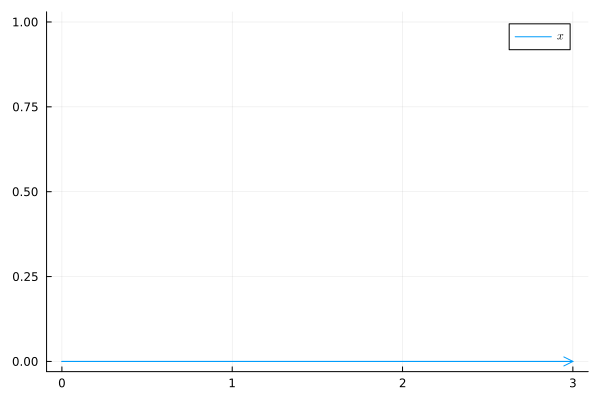

In [111]:
# @title Ex. 3
# @markdown Plot of $x=\begin{bmatrix}3 \\ 0\end{bmatrix}$
x = [3; 0]
plot([0, x[1]], [0, x[2]], arrow = true, linewidth = 1, label = "\$x\$")

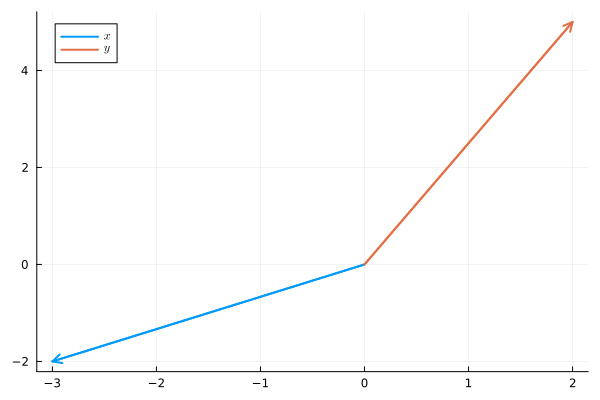

In [112]:
# @title Ex. 4
# @markdown Plot of $A=\begin{bmatrix}-3 & 2\\ -2 & 5\end{bmatrix}$
#@title Matrix plot
A = [-3 2; -2 5]
plot([0, A[1, 1]], [0, A[2, 1]], arrow = true, linewidth = 2, label = "\$x\$")
plot!([0, A[1, 2]], [0, A[2, 2]], arrow = true, linewidth = 2, label = "\$y\$")

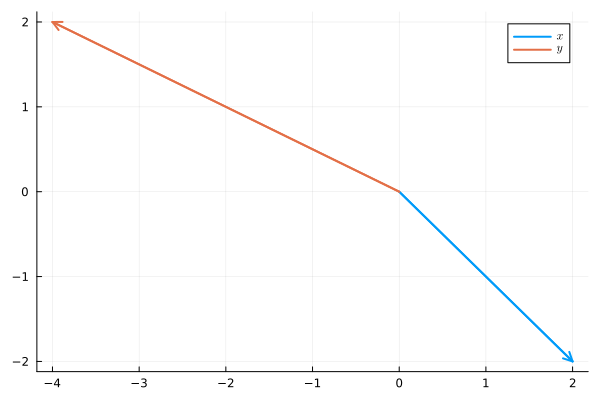

In [113]:
# @title Ex. 5
# @markdown Plot of $A=\begin{bmatrix}x + y \quad x-y\end{bmatrix}$ where $x = \begin{bmatrix}-1 \\ 0\end{bmatrix}$ and $y=\begin{bmatrix}3 \\ -2\end{bmatrix}$

#@title Matrix plot
A = [2 -4; -2 2]
plot([0, A[1, 1]], [0, A[2, 1]], arrow = true, linewidth = 2, label = "\$x\$")
plot!([0, A[1, 2]], [0, A[2, 2]], arrow = true, linewidth = 2, label = "\$y\$")

### Bonus track: 3D plot
What if we have $A = \begin{bmatrix}1 & -1 & 3\\ 2 & -1 & 1 \\ 3 & -1 & 2\end{bmatrix} = [\vec{x} \quad \vec{y} \quad \vec{z}]$?

Simple!

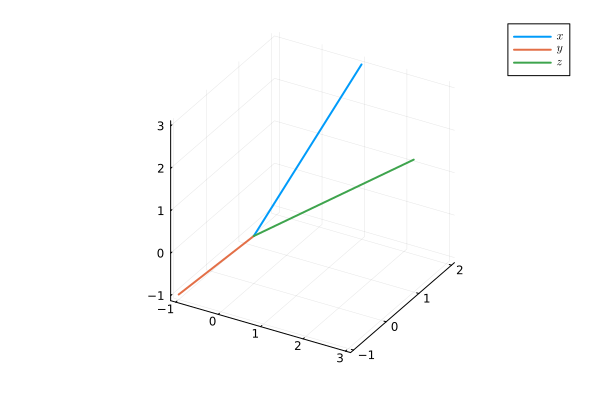

In [90]:
#@title 3D plot
A = [1 -1 3; 2 -1 1; 3 -1 2]
plot([0, A[1, 1]], [0, A[2, 1]], [0, A[3, 1]], linewidth=2, label="\$x\$")
plot!([0, A[1, 2]], [0, A[2, 2]], [0, A[3, 2]], linewidth=2, label="\$y\$")
plot!([0, A[1, 3]], [0, A[2, 3]], [0, A[3, 3]], linewidth=2, label="\$z\$")

## Properties

There are some interesting facts about matrices (check the cheatsheet in [helpful resources](#resources) section). Some that we will cover here are:

- Addition: $A + B = B + A$
- Symmetry: $A = A^T$
- Identity: $A I = A$
- Trace: $\text{Tr}(A)=\sum_i a_{ii}$
- Trace addition: $\text{Tr}(A+B) = \text{Tr}(A) + \text{Tr}(B)$
- Trace product: $\text{Tr}(AB) = \text{Tr}(BA)$

This also makes way to define how matrices are multiplied to each other. Whether you know it or not:
- $cA$, with $c$ scalar is equivalent to an element-wise product, i.e., every element of $A$ is multiplied by $c$.
- $A\vec{x}$, with $x$ vector needs to respect size properties. This is, if $A\in\mathrm{R^{2\times 2}}$ and $x\in \mathrm{R}^{2\times 1}$, then the product is valid. The validity follows the rule that given two elements of dimensions $m\times n$ and $j \times k $ respectively, the product is only valid if $n=j$.

Let's dive a bit on these properties.

- Can you think of a symmetric matrix?

That's right, the identity matrix is a symmetric one! Check this out:

In [91]:
A = [1 0 0; 0 1 0; 0 0 1]

3×3 Matrix{Int64}:
 1  0  0
 0  1  0
 0  0  1

Then

In [92]:
A'

3×3 adjoint(::Matrix{Int64}) with eltype Int64:
 1  0  0
 0  1  0
 0  0  1

Aren't they the same? **Yes, they are**. The identity matrix is symmetric. Do you have any other in mind? If you don't there you have another one:

In [93]:
A = [1 2 3; 2 1 4; 3 4 1]

3×3 Matrix{Int64}:
 1  2  3
 2  1  4
 3  4  1

And the proof? Well, there you go!

In [94]:
A'

3×3 adjoint(::Matrix{Int64}) with eltype Int64:
 1  2  3
 2  1  4
 3  4  1

We can also think of this as a programming problem. Let's say that we want a matrix ($10\times 10$) in which the elements are one when $i>j$, where $i$ is the row and $j$ the column:

In [95]:
A = zeros(10, 10)
for i=1:10
    for j=1:10
        if i>j
            A[i, j] = 1.0
        end
    end
end
A

10×10 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0

There! This is a lower triangular matrix. You can extend this code to make magic happens.

## Your turn


In [99]:
#@title Ex. 1
#@markdown The trace of matrix can be computed in Julia with `tr`, but also manually by going through all the diagonal components. Write some code to compute the trace of X
X = [40 30 1; 20 -50 10; -10 30 1]
trace_x = 0
for i=1:3
    trace_x = trace_x + (X[i, i])
end

-9


In [105]:
#@title Ex. 2
#@markdown Fill a matrix which components $a_{ij}$ are 1 when $ij$ is odd and 0 otherwise.
A = zeros(10, 10)
for i=1:10
    for j=1:10
        if isodd(i*j)
            A[i, j] = 1.0
        end
    end
end
A

10×10 Matrix{Float64}:
 1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

<a name="matrix2"></a>
## System representation

Interestingly enough, matrices can summarize a system of equations. Let's check the following

$$
\begin{aligned}
x_1 + x_2 &= 0\\
x_1 + 2x_2 &= -0.5
\end{aligned}
$$

We could rewrite it to have a form of $A x = b$ with

$$
A = \begin{bmatrix}1 & 1\\ 1 & 2\end{bmatrix}, \quad b = \begin{bmatrix}0 \\ -0.5\end{bmatrix} \quad x = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}
$$

It is only a matter of reordering things and remember, right-way matrix products follow the "row times column and sum everything" principle. In other way,
$$
\begin{aligned}
b_1 &= a_{11}x_1 + a_{12}x_2 &&\rightarrow &&&0=x_1+x_2\\
b_2 &= a_{21}x_1 + a_{22}x_2 &&\rightarrow &&&-0.50=x_1+2x_2\\
\end{aligned}
$$

### Bonus track: Matrix inversion
Theoretical matrix inversion is done through different techniques, but now - since this is a bonus track - we'll focus on a numerical approach. This is, we'll use Julia to do it:

First let's define things we know

In [54]:
A = [1 1; 1 2]
b = [0; -0.5]

2-element Vector{Float64}:
  0.0
 -0.5

Now, let's write

$A x = b \rightarrow A^{-1}A x = A^{-1}b \rightarrow x = A^{-1} b$

What is $A^{-1}$? It is the inverse of the matrix, the one which makes $AA^{-1}=I$. OK, how do we find it?

In [55]:
x = inv(A)*b
x

2-element Vector{Float64}:
  0.5
 -0.5

That way, $x_1=0.5$ and $x_2=-0.5$. Great! Isn't it?

**Just beware, the inverse does not always exist. There is another thing called the pseudoinverse that exists, and it returns the inverse when it exists.**

<a name="taylor"></a>
# Taylor expansions

These tools allow approximate functions and are particularly useful when linearizing things. The analytical formulation for the second order expansion is
$$
f(x)\approx f(x_0)+f'(x_0)(x-x_0)+\frac{1}{2}f''(x_0)(x-x_0)^2
$$
Moreover, the general formula is
$$
\sum_{n=0}^k\frac{f^{(n)}(a)(x-a)^n}{n!}
$$

Let's approximate a function!

Can we do it for $f(x)=x^4+x^3$?

The first order approximation around $x_0=1$ is:

$f(x) \approx 2 + (7)(x - 1)$

Visually,

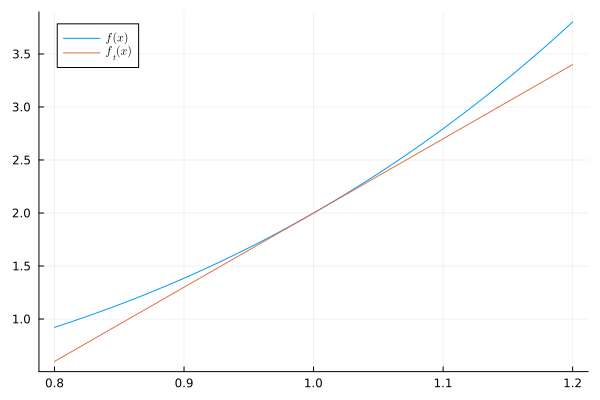

In [69]:
#@title Taylor 1D
ft(x) = 2 .+ 7*(x .- 1)
f(x) = x.^4+x.^3
x = 0.8:1e-2:1.2
plot(x, f(x), label="\$f(x)\$")
plot!(x, ft(x), label="\$f_t(x)\$")

The second order approximation will be
$
f(x)\approx 2 + (7)(x-1) + \frac{1}{2} (18)(x-1)^2
$

Or, visually

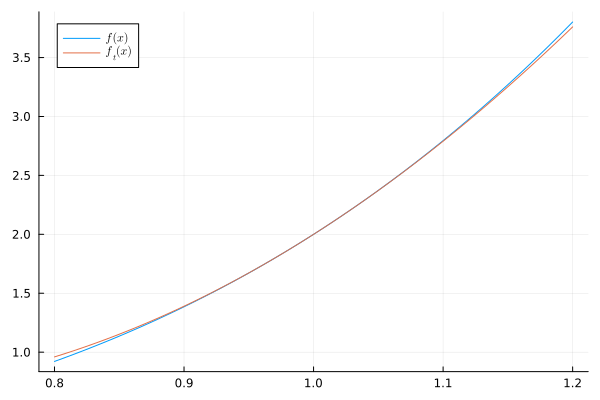

In [70]:
#@title Taylor 1D
ft(x) = 2 .+ 7*(x .- 1) + 1/2*18*(x .- 1).^2
f(x) = x.^4+x.^3
x = 0.8:1e-2:1.2
plot(x, f(x), label="\$f(x)\$")
plot!(x, ft(x), label="\$f_t(x)\$")

Great! Right?

### Your turn

#### Ex. 1
Find the first order expansion of
- $f(x) = x^2 - 1$
- $f(x) = x^5 - x^3 + x^2$
- $f(x) = \sin(x)e^x$

## Multivariate Taylor expansion
However, what happens if we have an expression with more variables?
Well, the answer is that the Taylor expansion holds but with some modifications

$$
f(x) \approx f(x_0) + (x-x_0)^T∇f(x_0) + \frac{1}{2}(x-x^0)^T∇^2f(x-0)
$$

By only focusing on the firs order approximation, what is $∇f(x_0)$? If we have $f(x_1,x_2)$, then

$
∇f(x)=\begin{bmatrix}\frac{\partial f}{\partial x_1}\\ \frac{\partial f}{\partial x_2}\end{bmatrix}
$

Can we find the approximation for $f$ around $x=\begin{bmatrix}1\\1\end{bmatrix}$?

$$
f(x) = x_1^2+x_2^2
$$

Well, with $\frac{\partial f}{\partial x_1}=2x_1$ and $\frac{\partial f}{\partial x_2}=2x_2$ we can say

$$
f(x) \approx 2 + \left(\begin{bmatrix}x_1\\x_2\end{bmatrix} - \begin{bmatrix}1 \\ 1\end{bmatrix}\right)^T\begin{bmatrix}2x_1 \\ 2x_2\end{bmatrix}
$$

### Your turn



### Ex. 1

Implement the expansion in code.

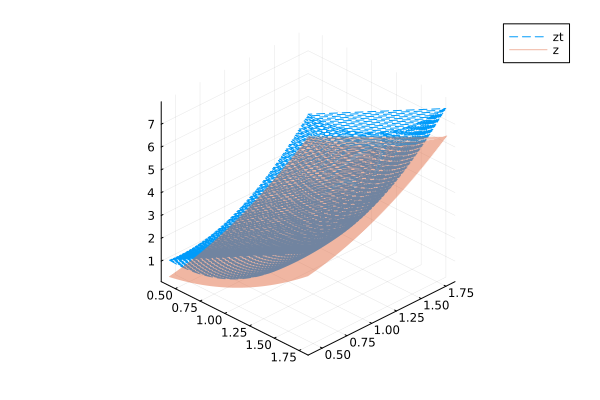

In [203]:
range = 0.4:1e-2:1.8
X = [x for x in range, y in range]
Y = [y for x in range, y in range]
x = hcat(vec(X), vec(Y))
f(x) = x[1].^2 + x[2].^2
ft(x) = 2 + (x .- 1)'*[2*x[1]; 2*x[2]]
z = mapslices(f, x, dims=2)[:, 1]
zt = mapslices(ft, x, dims=2)[:,1]

plot(x[:, 1], x[:, 2], zt, linestyle = :dash, label = "zt")
plot!(x[:, 1], x[:, 2], z, label = "z", opacity = 0.5)
camera = (45, 30)
plot!(camera = camera)

<a name="resources"> </a>
# Helpful resources
* Basic matrix properties: https://math.mit.edu/~dyatlov/54summer10/matalg.pdf
* Matrix Cookbook (A **must have**):
https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf
* Taylor series: https://www2.math.upenn.edu/~pemantle/104A-public/Worksheet17.pdf
* Multivariable calculus: https://web.williams.edu/Mathematics/sjmiller/public_html/105Sp10/handouts/105ReviewSheet.pdf
* Taylor's theorem for one and several variables: https://www.rose-hulman.edu/~bryan/lottamath/mtaylor.pdf

# Solutions
Published already! :)

# Feedback

Please, answer this form https://forms.office.com/r/7LYt7djLTM.